<h2>Import Libereries </h2>

In [406]:
####################################
#Import all the required libraries#
###################################

# Import pandas,numpy and matplot libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Import Statsmodels,adf and eval measures libraries
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller
from statsmodels.tools.eval_measures import rmse, aic

<h2>Load data</h2>

In [407]:
df_Stock_Buy_Selling = pd.read_csv('Stock_Buy_Selling.csv')
df_Stock_Buy_Selling.head()

,Date,Buy_stock_amount,Selling_stock_amount
0,01-01-2021,1518.43,3593.48
1,02-01-2021,1517.35,3593.19
2,03-01-2021,1517.87,3618.81
3,04-01-2021,1521.39,3622.37
4,05-01-2021,1532.26,3654.15


<h2>Preparing the dataset</h2>

In [408]:
print("######################")
print("Preparing the dataset")
print("######################")

df_Stock_Buy_Selling = df_Stock_Buy_Selling[["Buy_stock_amount","Selling_stock_amount"]]
df_Stock_Buy_Selling.head()

######################
Preparing the dataset
######################


,Buy_stock_amount,Selling_stock_amount
0,1518.43,3593.48
1,1517.35,3593.19
2,1517.87,3618.81
3,1521.39,3622.37
4,1532.26,3654.15


<h2>Visualization of dataset</h2>

				**********************************************
				   Visualization of Stock Buy and Selling     
				**********************************************


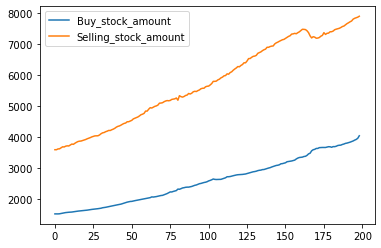

In [409]:
print("\t\t\t\t**********************************************")
print("\t\t\t\t   Visualization of Stock Buy and Selling     ")
print("\t\t\t\t**********************************************")
df_Stock_Buy_Selling.plot()

				**********************************************************************
				   Pattern of TS in their log values of Stock Buy and Selling data    
				**********************************************************************


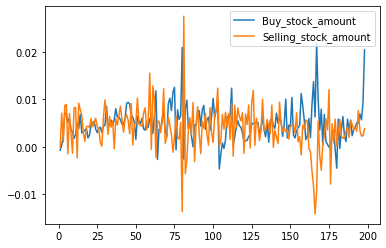

In [410]:
print("\t\t\t\t**********************************************************************")
print("\t\t\t\t   Pattern of TS in their log values of Stock Buy and Selling data    ")
print("\t\t\t\t**********************************************************************")

data = np.log(df_Stock_Buy_Selling).diff().dropna()
data.plot()

<h2>Check for Stationarity -Dickey-fuller Test</h2>

In [411]:
print("*********************************************")
print("Dickey-fuller Test - Result- Buy_stock_amount")
print("*********************************************")
#calling adfuller function for diesel price with autolag='AIC'
df_adftest = adfuller(df_Stock_Buy_Selling["Buy_stock_amount"],autolag='AIC')
#getting output from df_adftest
dfoutput=pd.Series(df_adftest[0:4],index=['Test Statistic','p-value','#lags used','Observation numbers for test'])
for key,value in df_adftest[4].items():
    dfoutput['critical value (%s)'%key]= value
print(dfoutput)

print("**************************************************")
print("Dickey-fuller Test - Result (Selling_stock_amount)")
print("**************************************************")
#calling adfuller function for diesel price with autolag='AIC'
df_adftest = adfuller(df_Stock_Buy_Selling["Selling_stock_amount"],autolag='AIC')
#getting output from df_adftest
dfoutput=pd.Series(df_adftest[0:4],index=['Test Statistic','p-value','#lags used','Observation numbers for test'])
for key,value in df_adftest[4].items():
    dfoutput['critical value (%s)'%key]= value
print(dfoutput)

*********************************************
Dickey-fuller Test - Result- Buy_stock_amount
*********************************************
Test Statistic                    2.727828
p-value                           0.999088
#lags used                        4.000000
Observation numbers for test    194.000000
critical value (1%)              -3.464515
critical value (5%)              -2.876556
critical value (10%)             -2.574775
dtype: float64
**************************************************
Dickey-fuller Test - Result (Selling_stock_amount)
**************************************************
Test Statistic                   -0.345914
p-value                           0.918745
#lags used                        4.000000
Observation numbers for test    194.000000
critical value (1%)              -3.464515
critical value (5%)              -2.876556
critical value (10%)             -2.574775
dtype: float64


<h2>Train-Test Split</h2>

In [412]:
print("#################################")
print("          Train-Test Split       ")
print("#################################")
test_split = 70
df_train = df_Stock_Buy_Selling[:-test_split]
df_test = df_Stock_Buy_Selling[-test_split:]
# Check size
print("Train datset size:",df_train.shape) 
print("Test datset size:",df_test.shape)

#################################
          Train-Test Split       
#################################
Train datset size: (129, 2)
Test datset size: (70, 2)


In [413]:
df_train.head()

,Buy_stock_amount,Selling_stock_amount
0,1518.43,3593.48
1,1517.35,3593.19
2,1517.87,3618.81
3,1521.39,3622.37
4,1532.26,3654.15


In [414]:
df_test.head()

,Buy_stock_amount,Selling_stock_amount
129,2880.04,6612.30
130,2887.26,6621.11
131,2898.87,6644.15
132,2917.35,6710.96
133,2927.91,6733.41


In [415]:
print("#################################")
print("   Applying 1st difference       ")
print("#################################")
df_differ = df_train.diff().dropna()
df_differ.head()

#################################
   Applying 1st difference       
#################################


,Buy_stock_amount,Selling_stock_amount
1,-1.08,-0.29
2,0.52,25.62
3,3.52,3.56
4,10.87,31.78
5,10.74,32.89


In [416]:
print("****************************************************")
print("Re-run Dickey-fuller Test - Result- Buy_stock_amount")
print("****************************************************")
df_adftest = adfuller(df_differ["Buy_stock_amount"],autolag='AIC')
dfoutput=pd.Series(df_adftest[0:4],index=['Test Statistic','p-value','#lags used','Observation numbers for test'])
for key,value in df_adftest[4].items():
    dfoutput['critical value (%s)'%key]= value
print(dfoutput)

print("*********************************************************")
print("Re-run Dickey-fuller Test - Result (Selling_stock_amount)")
print("*********************************************************")
df_adftest = adfuller(df_differ["Selling_stock_amount"],autolag='AIC')
dfoutput=pd.Series(df_adftest[0:4],index=['Test Statistic','p-value','#lags used','Observation numbers for test'])
for key,value in df_adftest[4].items():
    dfoutput['critical value (%s)'%key]= value
print(dfoutput)

****************************************************
Re-run Dickey-fuller Test - Result- Buy_stock_amount
****************************************************
Test Statistic                   -5.352843
p-value                           0.000004
#lags used                        3.000000
Observation numbers for test    124.000000
critical value (1%)              -3.484220
critical value (5%)              -2.885145
critical value (10%)             -2.579359
dtype: float64
*********************************************************
Re-run Dickey-fuller Test - Result (Selling_stock_amount)
*********************************************************
Test Statistic                   -1.104614
p-value                           0.713228
#lags used                        9.000000
Observation numbers for test    118.000000
critical value (1%)              -3.487022
critical value (5%)              -2.886363
critical value (10%)             -2.580009
dtype: float64


<h2>Grid Search for Order P</h2>

In [418]:
print("****************************************************************")
print("      Select the Order (P) of VAR model using select_order      ")
print("****************************************************************")
Order_of_VAR_model= var_model.select_order()
Order_of_VAR_model.summary()

****************************************************************
      Select the Order (P) of VAR model using select_order      
****************************************************************


,AIC,BIC,FPE,HQIC
0,21.13,21.18,1.508e+09,21.15
1,10.47,10.61,3.516e+04,10.53
2,10.34,10.58*,3.095e+04,10.44*
3,10.36,10.69,3.148e+04,10.49
4,10.29,10.72,2.948e+04,10.46
5,10.26,10.78,2.862e+04,10.47
6,10.25*,10.87,2.839e+04*,10.50
7,10.26,10.98,2.877e+04,10.55
8,10.30,11.11,2.997e+04,10.63
9,10.35,11.26,3.157e+04,10.72


In [397]:
print("****************************************************************")
print("      Select the Order (P) of VAR model using iterative method  ")
print("****************************************************************")
for i in range(1,10):
    VAR_results = var_model.fit(i)
    print("******************************")
    print("Order =", i)
    print("AIC: ", VAR_results.aic)
    print("BIC: ", VAR_results.bic)
    print("******************************")

****************************************************************
      Select the Order (P) of VAR model using iterative method  
****************************************************************
******************************
Order = 1
AIC:  10.349366797840396
BIC:  10.483055716461628
******************************
******************************
Order = 2
AIC:  10.206042474464235
BIC:  10.429994213555464
******************************
******************************
Order = 3
AIC:  10.225571325080146
BIC:  10.540713759185866
******************************
******************************
Order = 4
AIC:  10.176869167828809
BIC:  10.58414634600034
******************************
******************************
Order = 5
AIC:  10.149485037266157
BIC:  10.649857573099307
******************************
******************************
Order = 6
AIC:  10.155201687131003
BIC:  10.74964716062436
******************************
******************************
Order = 7
AIC:  10.168084326759509
BIC:  10.

<h2> Fit the model at 4</h2>

In [398]:
print("*****************************************")
print("      Building VAR model and summary     ")
print("*****************************************")
VAR_results = var_model.fit(4)
VAR_results.summary()

*****************************************
      Building VAR model and summary     
*****************************************


  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Sat, 01, Jul, 2023
Time:                     16:49:51
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                    10.5841
Nobs:                     125.000    HQIC:                   10.3423
Log likelihood:          -972.789    FPE:                    26301.2
AIC:                      10.1769    Det(Omega_mle):         22886.8
--------------------------------------------------------------------
Results for equation Buy_stock_amount
                             coefficient       std. error           t-stat            prob
------------------------------------------------------------------------------------------
const                          -8.054644         6.241317           -1.291           0.197
L1.Buy_stock_amount             1.104450         0.091551           12.064           0.000
L1.Sellin

In [399]:
print("**********************************************************************************")
print("Analysis of Serial Correlation of Residuals  using Durbin Watson Statistic        ")
print("**********************************************************************************")
from statsmodels.stats.stattools import durbin_watson
ScoR_DWS = durbin_watson(VAR_results.resid)
for col, val in zip(df_Stock_Buy_Selling.columns, ScoR_DWS):
    print(adjust(col), ':', round(val, 2))

**********************************************************************************
Analysis of Serial Correlation of Residuals  using Durbin Watson Statistic        
**********************************************************************************
Buy_stock_amount : 1.87
Selling_stock_amount : 2.04


<h2> Forecast VAR model </h2>

In [400]:
print("*************************************")
print("Get the lag order from the VAR model ")
print("*************************************")
lag_order = VAR_results.k_ar
print("lag order :",lag_order)

*************************************
Get the lag order from the VAR model 
*************************************
lag order : 4


In [401]:
print("*******************************")
print("Building Forecasting using lag ")
print("*******************************")
forecast_input = df_differ.values[-lag_order:]
forecast_input

*******************************
Building Forecasting using lag 
*******************************


array([[14.08, 59.92],
       [13.74, 77.56],
       [14.26,  2.15],
       [14.7 , 39.55]])

In [402]:
print("*********************************")
print("Forecasting Dataset for analysis ")
print("*********************************")
fc_Stock_Buy_Selling = VAR_results.forecast(y=forecast_input, steps=test_split)
df_Stock_Buy_Selling_forecast = pd.DataFrame(fc_Stock_Buy_Selling, index=df_Stock_Buy_Selling.index[-test_split:], columns=df_Stock_Buy_Selling.columns + '_2d')
df_Stock_Buy_Selling_forecast

*********************************
Forecasting Dataset for analysis 
*********************************


,Buy_stock_amount_2d,Selling_stock_amount_2d
129,10.287239,35.877458
130,4.874545,29.918678
131,-5.912631,29.765257
132,-15.193986,30.697767
133,-24.478311,31.694967
...,...,...
194,-227.615044,85.000887
195,-227.969646,84.974838
196,-228.306695,84.942605
197,-228.627264,84.904524


***************************************************
    Stock_Buy_Selling    Forecasting Plot          
***************************************************


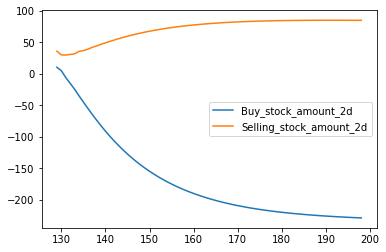

In [403]:
print("***************************************************")
print("    Stock_Buy_Selling    Forecasting Plot          ")
print("***************************************************")
df_Stock_Buy_Selling_forecast.plot()

In [404]:
forcast_actual=df_Stock_Buy_Selling_forecast["Buy_stock_amount_2d"] - df_Stock_Buy_Selling["Buy_stock_amount"]
forcast_data=df_Stock_Buy_Selling_forecast["Buy_stock_amount_2d"]
actual_data=df_Stock_Buy_Selling["Buy_stock_amount"]
me = np.mean(forcast_actual) 
mae = np.mean(np.abs(forcast_actual))
mpe = np.mean((forcast_actual)/actual_data)   
rmse = np.mean((forcast_actual)**2)**.5 

print("***************************")
print("       Model Evaluation    ")
print("***************************")
print("Mean :",me)
print("MAE (Mean absolute error)  :",mae)
print("MPE (Mean Percentage Error) :",mpe)
print("RMSE (Root Mean Squared Error) :",rmse)

***************************
       Model Evaluation    
***************************
Mean : -3585.6982402764497
MAE (Mean absolute error)  : 3585.6982402764497
MPE (Mean Percentage Error) : -1.0477819392347547
RMSE (Root Mean Squared Error) : 3607.4479295363303


<h2> VARMAX </h2>

In [489]:
VARMAX_results=VARMAX(df_train, order=(1, 2))

In [490]:
VARMAX_model=VARMAX_results.fit(disp=False)

In [491]:
VARMAX_model.summary()

Dep. Variable:,"['Buy_stock_amount', 'Selling_stock_amount']",No. Observations:,129
Model:,"VARMA(1,2)",Log Likelihood,-2511.970
,+ intercept,AIC,5057.939
Date:,"Mon, 03 Jul 2023",BIC,5106.556
Time:,01:57:50,HQIC,5077.693
Sample:,0,,
,- 129,,
Covariance Type:,opg,,
Ljung-Box (L1) (Q):,"9.27, 81.09",Jarque-Bera (JB):,"20.25, 2.89"
Prob(Q):,"0.00, 0.00",Prob(JB):,"0.00, 0.24"
Heteroskedasticity (H):,"3.80, 6.63",Skew:,"0.14, 0.23"


In [484]:
VARMAX_model_forecast=VARMAX_model.forecast(10)
VARMAX_model_forecast

,Buy_stock_amount,Selling_stock_amount
129,2910.386358,6447.970162
130,2946.983160,6259.374810
131,2628.796908,5612.640483
132,2536.471245,5475.438487
133,2443.963178,5325.875418
134,2367.019529,5202.315160
135,2301.928896,5097.718987
136,2246.956685,5009.388187
137,2200.522469,4934.775986
138,2161.300788,4871.753191


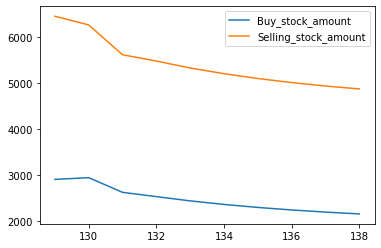

In [485]:
VARMAX_model_forecast.plot()

<h2> SARIMAX </h2>

In [572]:
#load SARIMA libraries
from statsmodels.tsa.statespace.sarimax import SARIMAX
from random import random

In [573]:
#load Stock_Buy_SARIMAX data
df_Stock_Buy_SARIMA = pd.read_csv("Stock_Buy_SARIMA.csv")

In [574]:
print("*********************")
print(" Stock Buy data      ")
print("*********************")
df_Stock_Buy_SARIMA.head()

*********************
 Stock Buy data      
*********************


,Date,Buy_stock_amount
0,01-01-2021,1518.43
1,02-01-2021,1517.35
2,03-01-2021,1517.87
3,04-01-2021,1521.39
4,05-01-2021,1532.26


**********************************************
 Visualization of Stock Buy plot (Actual)     
**********************************************


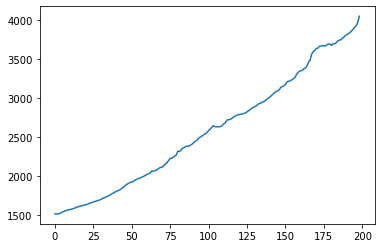

In [575]:
print("**********************************************")
print(" Visualization of Stock Buy plot (Actual)     ")
print("**********************************************")
df_Stock_Buy_SARIMA["Buy_stock_amount"].plot()

In [576]:
#apply SARIMAX model on df_Stock_Buy_SARIMA
SARIMA_results=SARIMAX(df_Stock_Buy_SARIMA['Buy_stock_amount'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 2))

In [577]:
SARIMA_results_fit = SARIMA_results.fit(disp=False)

In [578]:
SARIMA_results_forecast=SARIMA_results_fit.forecast(10)
SARIMA_results_forecast

199    4085.218820
200    4118.427420
201    4151.800550
202    4173.171884
203    4200.533695
204    4219.529316
205    4243.659391
206    4262.432299
207    4285.041427
208    4303.946263
Name: predicted_mean, dtype: float64

****************************************************
 Visualization of Stock Buy plot (Forecasting)      
****************************************************


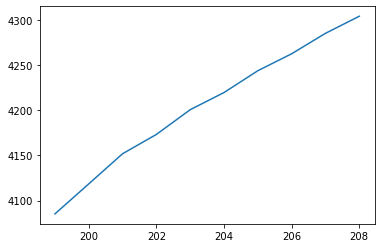

In [579]:
print("****************************************************")
print(" Visualization of Stock Buy plot (Forecasting)      ")
print("****************************************************")
SARIMA_results_forecast.plot()

In [580]:
#load Stock_Buy_SARIMAX data [exogenous variable]
df_Stock_Sell_SARIMAX = pd.read_csv("Stock_Sell_SARIMAX.csv")

In [582]:
#apply SARIMAX model on df_Stock_Buy_SARIMA and df_Stock_Sell_SARIMAX [exogenous ]
SARIMAX_results=SARIMAX(df_Stock_Buy_SARIMA['Buy_stock_amount'], exog=df_Stock_Sell_SARIMAX['Selling_stock_amount'], order=(1, 1, 1), seasonal_order=(0, 0, 0, 0))

In [584]:
SARIMAX_results_fit = SARIMAX_results.fit(disp=False)

In [585]:
 SARIMAX_results_forecast=SARIMAX_results_fit.predict(len(df_Stock_Buy_SARIMA['Buy_stock_amount']), len(df_Stock_Buy_SARIMA['Buy_stock_amount']) + len(df_Stock_Sell_SARIMAX['Selling_stock_amount']) - 1, exog=df_Stock_Buy_SARIMA['Buy_stock_amount'].values)

In [586]:
SARIMAX_results_forecast

199    4501.191145
200    4540.925977
201    4580.115347
202    4618.521269
203    4655.400355
          ...     
393    8345.656679
394    8351.425610
395    8357.933518
396    8361.922399
397    8358.114390
Name: predicted_mean, Length: 199, dtype: float64

****************************************************
 Visualization of Stock Buy plot (Forecasting)      
****************************************************


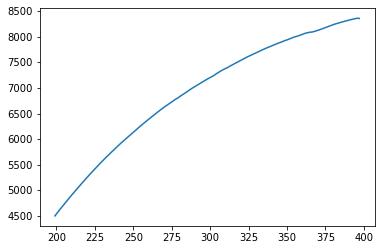

In [587]:
print("****************************************************")
print(" Visualization of Stock Buy plot (Forecasting)      ")
print("****************************************************")
SARIMAX_results_forecast.plot()